In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=0.5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/AML - AIRBNB/airbnb-recruiting-new-user-bookings/'
train_users = pd.read_csv(path + 'train_users_2.csv/train_users_2.csv')
test_users = pd.read_csv(path + 'test_users.csv/test_users.csv')

In [0]:
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [5]:
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
users.shape[0]

275547

In [0]:
#stampiamo le variabili con le relative percentuali di nan
train_users_nan = (train_users.isnull().sum() / train_users.shape[0]) * 100
train_users_nan

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

In [0]:
test_users_nan = (test_users.isnull().sum() / test_users.shape[0]) * 100
test_users_nan

#date firt booking ha nan anche nel train ma non ci interessa perchè tanto nel 
#test è tutta nan e quindi non la utilizzimao nel modello. 

id                           0.000000
date_account_created         0.000000
timestamp_first_active       0.000000
date_first_booking         100.000000
gender                       0.000000
age                         46.502190
signup_method                0.000000
signup_flow                  0.000000
language                     0.000000
affiliate_channel            0.000000
affiliate_provider           0.000000
first_affiliate_tracked      0.032208
signup_app                   0.000000
first_device_type            0.000000
first_browser                0.000000
dtype: float64

In [0]:
#vediamo che age ha un alta percentuale di missing e la analizziamo
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [0]:
#vediamo un po' di anomalie negli anni e stampiamo quanti hanno più di 122 e meno di 18 anni
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


In [0]:
#quindi chi ha più di 95 anni e meno di 13 diventa nan
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

In [0]:
users.age.describe()

count    155825.000000
mean         36.012418
std          11.553568
min          15.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

In [0]:
(users.isnull().sum() / users.shape[0]) * 100
#quindi age adesso ha 43 percento mentre prima 41 non è aumentato di tanto
#country destination ha tanto nan perchè è presente anche il test set ed è la variabile da prevedere

affiliate_channel           0.000000
affiliate_provider          0.000000
age                        43.448849
country_destination        22.535538
date_account_created        0.000000
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser               0.000000
first_device_type           0.000000
gender                      0.000000
id                          0.000000
language                    0.000000
signup_app                  0.000000
signup_flow                 0.000000
signup_method               0.000000
timestamp_first_active      0.000000
dtype: float64

Country destination ha missing ma sono solo quelli del test
Date first booking va eliminata dal train perchè nel test è tutta null
Age rimane l'unica con nan
First affiliate tracked ha il 2 % ma non è significativo

In [0]:
users.dtypes

affiliate_channel           object
affiliate_provider          object
age                        float64
country_destination         object
date_account_created        object
date_first_booking          object
first_affiliate_tracked     object
first_browser               object
first_device_type           object
gender                      object
id                          object
language                    object
signup_app                  object
signup_flow                  int64
signup_method               object
timestamp_first_active       int64
dtype: object

In [0]:
#trasformiamo le variabili categoriche nel type cateogrical 
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [0]:
#trasformiamo le date into datatipe (tranne date first booking perchè lo elimiamo)
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

data visualization

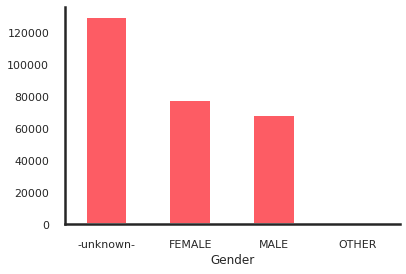

In [0]:
#qua vediamo la distribuzione della variabile gender
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

In [0]:
#distribuzione della variabile gender in numeri
np.unique(users['gender'], return_counts=True)

(array(['-unknown-', 'FEMALE', 'MALE', 'OTHER'], dtype=object),
 array([129480,  77524,  68209,    334]))

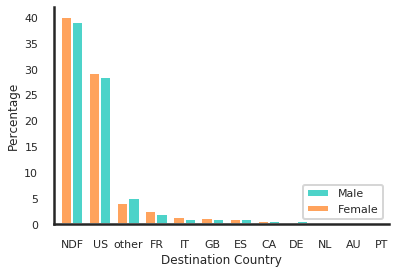

In [7]:
#vedere la distribuzione dei country destination dividendo male female
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend(loc='lower right')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

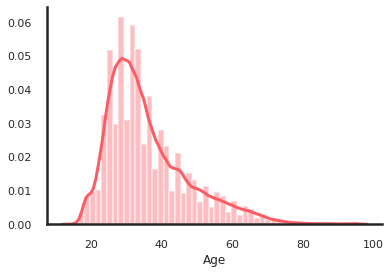

In [0]:
#age
sns.distplot(users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

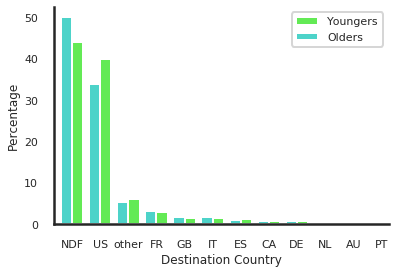

In [0]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend('lower right')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [0]:
#la lingua è per il 96% infglese e quindi potrebbe essere da togliere poiché non discrimina tra gli utenti
np.unique(users['language'], return_counts=True)

(array(['-unknown-', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr',
        'hr', 'hu', 'id', 'is', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt',
        'ru', 'sv', 'th', 'tr', 'zh'], dtype=object),
 array([     1,      6,     49,     75,    977,     30, 265538,   1174,
            20,   1508,      2,     25,     23,      5,    633,    345,
          1116,    134,     51,     75,    322,    508,    176,     28,
            92,   2634]))

In [0]:
print((sum(users.language == 'en') / users.shape[0])*100)

96.3675888323952


Focus on date

si vede sia analizzando la data di creazione dell'account, che la prima data di attività dell'account che il numero di utenti è cresciuto molto dal 2010 al 2014.

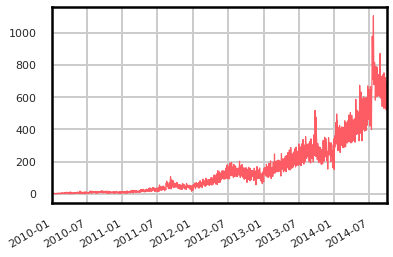

In [0]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=0.5)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

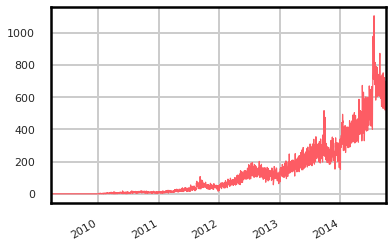

In [0]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
sns.set_context("poster", font_scale=0.5)

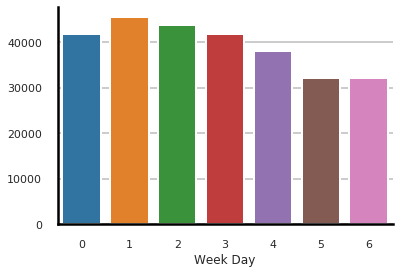

In [0]:
#come ci si poteva aspettare la domenica ci sono meno account creati perchè si sta meno al pc mentre si raggiunge il massimo di martedì.

weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()
sns.set_context("poster", font_scale=0.5)

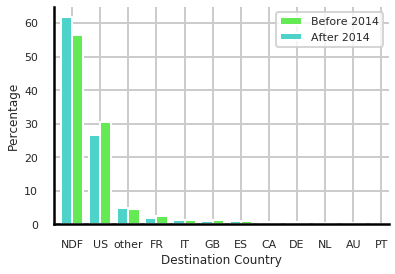

In [0]:
# considerazione evitabile..

#It's a clean comparision of usual destinations then and now, where we can see how the new users, register more and book less, and when they book they stay at the US

date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(users.loc[users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(users.loc[users['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = users.loc[users['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = users.loc[users['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
sns.set_context("poster", font_scale=0.5)
plt.show()